In [1]:
import pandas as pd

In [2]:
path = 'C:/Users/Learning/Data portal (local)/SMSSpamCollection'
messages = pd.read_csv(path, sep='\t', names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#data cleaning and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
ps = PorterStemmer()

In [5]:
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^A-Za-z]',' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review) 

In [6]:
#implementing BOG
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(max_features=5000)
x = cv.fit_transform(corpus).toarray()   

In [7]:
x.shape

(5572, 5000)

In [8]:
spam = pd.get_dummies(messages['label'],drop_first=True)
messages = pd.concat([spam,messages],axis=1)
messages

,spam,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,0,ham,Ok lar... Joking wif u oni...
2,1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,ham,U dun say so early hor... U c already then say...
4,0,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,1,spam,This is the 2nd time we have tried 2 contact u...
5568,0,ham,Will ü b going to esplanade fr home?
5569,0,ham,"Pity, * was in mood for that. So...any other s..."
5570,0,ham,The guy did some bitching but I acted like i'd...


In [9]:
messages.drop('label',axis=1,inplace=True)

In [10]:
messages.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
y = messages.iloc[:,0]

In [12]:
y.shape

(5572,)

In [13]:
y.value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [14]:
#balancing the imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_sample(x,y)

In [15]:
y.value_counts()

1    4825
0    4825
Name: spam, dtype: int64

In [16]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
#creating the model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()
spam_detect_model.fit(x_train,y_train)

MultinomialNB()

In [18]:
y_pred = spam_detect_model.predict(x_test)

In [19]:
#assessing accuracy of the model
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9735751295336788

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

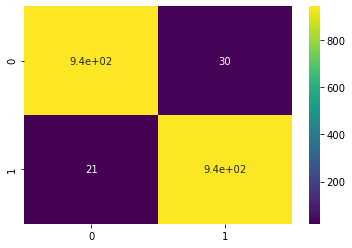

In [25]:
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()